In [1]:
from backtesting import Strategy
from backtesting.lib import crossover
from backtesting import Backtest
import pandas as pd
from backtesting.test import SMA
import pandas as pd
from bokeh.io import export_png
from backtesting.lib import SignalStrategy, TrailingStrategy
from backtesting import Position

/Users/fahad/anaconda3/lib/python3.7/site-packages/backtesting/_plotting.py:34: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `bokeh.io.reset_output()`.
  warnings.warn('Jupyter Notebook detected. '


Loading BokehJS ...

In [2]:
MAR_predictions = pd.read_csv("/Users/fahad/project_repo/models/final_models/Financial_Analysis/predictions/MAR_predictions_RFC.csv", index_col=0)


In [3]:
MAR_predictions.head()

Date  Predictions
0  2019-07-31            0
1  2019-06-28            0
2  2019-05-31            1
3  2019-04-30            1
4  2019-03-29            0

In [4]:
MAR_predictions.Date = pd.to_datetime(MAR_predictions.Date, format="%Y-%m-%d")

In [5]:
MAR_predictions['Predictions'] = MAR_predictions['Predictions'].shift(-1)


In [6]:
MAR_predictions = MAR_predictions.dropna()


In [7]:
MAR_predictions = MAR_predictions[::-1]

In [8]:
MAR_predictions.head(10)

Date  Predictions
112 2010-03-31          1.0
111 2010-04-30          0.0
110 2010-05-28          0.0
109 2010-06-30          0.0
108 2010-07-30          1.0
107 2010-08-31          1.0
106 2010-09-30          1.0
105 2010-10-29          1.0
104 2010-11-30          1.0
103 2010-12-31          0.0

In [9]:
MAR_monthly = pd.read_csv("/Users/fahad/project_repo/data/final/MAR/MAR_monthly.csv", index_col =0)

In [10]:
MAR_monthly.columns = ['Open','High','Low','Close','Volume']

In [11]:
MAR_predictions = MAR_predictions.set_index("Date")

In [12]:
MAR_monthly.tail()

Open    High      Low   Close    Volume
2000-01-31  31.563  34.750  30.1880  31.063  25538100
1999-12-31  32.813  34.250  29.9380  31.563  24289900
1999-11-30  33.750  36.250  31.4403  32.563  33680700
1999-10-29  31.750  33.938  31.6880  33.688  26051000
1999-09-30  34.188  34.875  30.8130  32.688  18002100

In [13]:
MAR_final_df = pd.merge(MAR_predictions, MAR_monthly, right_index=True, left_index=True)

In [14]:
MAR_final_df.index = pd.to_datetime(MAR_final_df.index, format ="%Y-%m-%d")

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

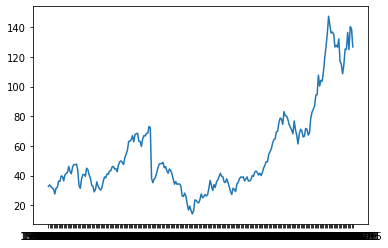

In [16]:
plt.plot(MAR_monthly.index[::-1], MAR_monthly.Close[::-1])

In [17]:
equity_dict = dict()

In [18]:
class Binary_Classification_1d(TrailingStrategy):

    
    def init(self):
        
        super().init()
        self.data.Predictions
        
    def next(self):
        super().init()
        equity_dict[self.data.index[-1]] = TrailingStrategy.equity.__get__(self)
        
        position = Strategy.position.__get__(self)
        
        if self.data.Predictions[-1] == 1.0 and (position.is_long != True) :
#             print("\n")
#             print (self.data.Prediction[-1])
            
            self.buy()

        # Else, if sma1 crosses below sma2, sell it
        elif self.data.Predictions[-1] == 0.0 and (position.is_short != True)  :
#             print("\n")
#             print (self.data.Prediction[-1])
            
            self.sell()
            
 

In [19]:
bt = Backtest(MAR_final_df, Binary_Classification_1d, cash=10000, commission=.02)
bt.run()



Start                          2010-03-31 00:00:00
End                            2019-07-31 00:00:00
Duration                        3409 days 00:00:00
Exposure [%]                               97.3306
Equity Final [$]                            170263
Equity Peak [$]                             171769
Return [%]                                 1602.63
Buy & Hold Return [%]                       341.18
Max. Drawdown [%]                         -18.7032
Avg. Drawdown [%]                         -6.21573
Max. Drawdown Duration           395 days 00:00:00
Avg. Drawdown Duration           112 days 00:00:00
# Trades                                        45
Win Rate [%]                               73.3333
Best Trade [%]                             49.8418
Worst Trade [%]                           -12.2159
Avg. Trade [%]                             6.45488
Max. Trade Duration              336 days 00:00:00
Avg. Trade Duration               74 days 00:00:00
Expectancy [%]                 

In [20]:
bt.plot(superimpose=False, plot_volume=False)

In [21]:
df = pd.DataFrame.from_dict([equity_dict])

In [22]:
df = df.T

In [23]:
df.columns = ['Equity']

In [24]:
export = df.to_csv("/Users/fahad/project_repo/data/final/Equity/RFC/MAR_RFC_Equity.csv")

In [25]:
df

Equity
2010-04-30   10000.000000
2010-05-28   10749.356469
2010-06-30   11678.901707
2010-07-30   10627.535725
2010-08-31    9494.579196
2010-09-30   10638.608143
2010-10-29   11000.849336
2010-11-30   11642.194399
2010-12-31   12334.015693
2011-01-31   12898.511129
2011-02-28   12513.918973
2011-03-31   13473.187386
2011-04-29   13560.797522
2011-05-31   14094.660449
2011-06-30   14571.155885
2011-07-29   12998.586162
2011-08-31   14312.168775
2011-09-30   15112.081770
2011-10-31   17403.630799
2011-11-30   16574.886476
2011-12-30   15500.622987
2012-01-31   18306.357967
2012-02-29   18747.411003
2012-03-30   20113.081249
2012-04-30   20772.003858
2012-05-31   20570.075962
2012-06-29   18952.881494
2012-07-31   17281.811910
2012-08-31   17879.699966
2012-09-28   18553.510315
...                   ...
2017-02-28   57214.800657
2017-03-31   61943.785790
2017-04-28   60703.408932
2017-05-31   67421.600621
2017-06-30   71036.355799
2017-07-31   68653.945388
2017-08-31   69028.499602
2017-09-29   71453.956762
2017-10-31   77428.974732
2017-11-30   82302.308260
2017-12-29   87959.781891
2018-01-31   95483.638575
2018-02-28   96565.754458
2018-03-29   99888.597380
2018-04-30   99443.857410
2018-05-31  100282.509926
2018-06-29  105848.112985
2018-07-31  105060.287895
2018-08-31  105930.707551
2018-09-28  108963.616188
2018-10-31  120112.695890
2018-11-30  113095.422020
2018-12-31  118984.296459
2019-01-31  127054.119567
2019-02-28  138968.563330
2019-03-29  136918.001725
2019-04-30  143732.819819
2019-05-31  155726.978650
2019-06-28  171769.254202
2019-07-31  170263.258174

[112 rows x 1 columns]